Clustering

In [45]:
import collections
import os
import string
import sys
from pyexpat import model
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [46]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiaaivali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
data_path = "../data/txt/"

In [48]:
DECADE = '1960'

In [49]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [50]:
# Exemple de fichiers
files[:5]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt']

In [51]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [52]:
# Exemple de textes
texts[0][:400]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 029"

In [53]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [54]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [55]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [56]:
# Détail de la matrice
tfidf_vectors

<1000x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 591250 stored elements in Compressed Sparse Row format>

In [57]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429822
ecrire        0.290745
agence        0.287284
bilingue      0.195608
importante    0.172357
                ...   
er            0.000000
erreurs       0.000000
esp           0.000000
espagne       0.000000
♦             0.000000
Length: 2997, dtype: float64

In [58]:
cosine([1, 2, 3], [1, 2, 3])

0

In [59]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [60]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

In [61]:
tfidf_array = tfidf_vectors.toarray()

In [62]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.01046606, ..., 0.01088858, 0.01243841,
       0.        ])

In [64]:
cosine(tfidf_array[0], tfidf_array[1])

0.9628815101868748

In [65]:
N_CLUSTERS = 6

In [66]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [67]:
clusters = km_model.fit_predict(tfidf_vectors)

In [68]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [69]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-08-28_01-00019.txt',
     'KB_JB838_1960-11-12_01-00017.txt',
     'KB_JB838_1960-11-13_01-00019.txt',
     'KB_JB838_1960-12-21_01-00017.txt',
     'KB_JB838_1960-12-23_01-00019.txt',
     'KB_JB838_1961-02-11_01-00017.txt',
     'KB_JB838_1961-02-11_01-00018.txt',
     'KB_JB838_1961-04-02_01-00018.txt',
     'KB_JB838_1961-04-07_01-00016.txt',
     'KB_JB838_1961-04-12_01-00019.txt',
     'KB_JB838_1961-06-30_01-00019.txt',
     'KB_JB838_1961-10-10_01-00016.txt',
     'KB_JB838_1962-01-09_01-00015.txt',
     'KB_JB838_1962-05-05_01-00023.txt',
     'KB_JB838_1962-10-14_01-00023.txt',
     'KB_JB838_1962-12-08_01-00020.txt',
     'KB_JB838_1962-12-09_01-00025.txt',
     'KB_JB838_1963-02-08_01-00016.txt',
     'KB_JB838_1963-04-07_01-00024.txt',
     'KB_JB838_1963-04-18_01-00020.txt',
     'KB_JB838_1

In [70]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [71]:
reduced_vectors[:10]

array([[ 0.49940241, -0.43947925],
       [-0.22882534,  0.00137831],
       [-0.27935517, -0.01591038],
       [ 0.28620178,  0.51679286],
       [ 0.30678363,  0.51829425],
       [-0.28971532, -0.09053796],
       [-0.04734941,  0.04053599],
       [-0.06057916,  0.11984371],
       [-0.22345179, -0.05226814],
       [-0.1213846 ,  0.07470421]])

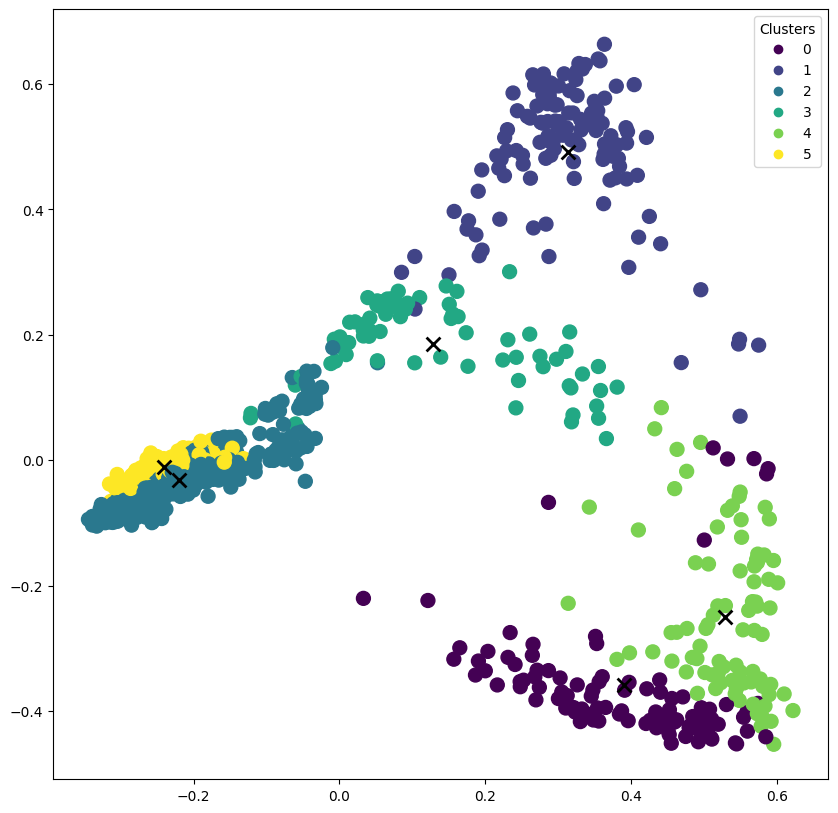

In [72]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Word embeddings 

In [73]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [74]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [75]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

In [76]:
bigram_phrases = Phrases(sentences)

In [77]:
type(bigram_phrases.vocab)

dict

In [78]:
len(bigram_phrases.vocab.keys())

15761694

In [79]:
key_ = list(bigram_phrases.vocab.keys())[0]
print(key_)

raege


In [80]:
bigram_phrases.vocab[key_]

2

In [81]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [82]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [83]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [84]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [85]:
print(corpus[:100])

[['raege', 'quotidien', 'j00', 'exemplaires_distribues', 'gratuitement', '#', 'k', '.', "'", 'dans', 'ilagg', ';', 'lomeration', 'bruxelloise', 'et', '.', 'en_province', '.'], ['i', 'personnes_habitant', 'aux_etages', 'fenile', 'journal_contre', '60', 'c', '"<<', 'par_mois', '.'], ['fspir', 'est', 'expedie', 'en', 'proyinoe', 'contre', 't', '*>>"', 'par_mois', ',', 'payables_par_trimestre', '.'], ['annonces', ',', 'faits_divers', 'et', 'reclames', 'sjont', 'recu', 'frie', 'd', "'", 'isabelle', ';', 'a', 'l', "'", 'agence', 'rossfjl', '.'], ['44', '.'], ['-', 'v', ',', 'et', 'do', 'l', "'", 'enseignement', ',', 'a', 'braxell', 'annonces_remises_avant', 'midi', 'sont', ';', '-', 'a', ";'%", '>', '1', 'v', '>>^.'], [':', 'vv', '*', "*'*", 'hv', '/', 'f', '#-', 'v', '1', 'v', ';', "'", 'y', '>', 'fif', "'", 'ji', 'l', "'", 'h', '-', 'et', '.'], ['jeudi', '22', 'decembre', 'i887', 'observatoire', 'roy', "&'", 'cs', 'io', 'decembre', 's', 'heurts', 'uat', '$', 'r', '-:', 'r', 'quotidien_grat

In [86]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=4, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: user 5min 11s, sys: 36 s, total: 5min 47s
Wall time: 25min 11s


In [87]:
outfile = f"../data/newspapers.model"
model.save(outfile)

In [88]:
model = Word2Vec.load("../data/newspapers.model")

In [89]:
model.wv["criminels"]

array([ 0.39053288,  1.1019465 ,  0.90601563,  0.3998147 ,  0.72783166,
       -0.14209174,  0.8096399 ,  1.167905  , -2.3260117 , -0.93634915,
       -0.1771784 , -1.6245595 ,  1.7975569 ,  1.7792645 , -2.1142461 ,
        0.60024273, -1.1320558 ,  1.3963515 ,  1.0841475 , -0.12541628,
        1.1756951 , -1.1888192 , -0.2336541 ,  1.3355459 ,  2.6289372 ,
        2.4021115 , -1.8214469 ,  1.4759063 , -0.01821707, -0.47282895,
       -0.7595232 , -0.9048776 ], dtype=float32)

In [90]:
model.wv.similarity("criminels", "assassin")

0.20264205

In [91]:
model.wv.similarity("politique", "elections")

0.38329852

In [92]:
model.wv.similarity("heroique", "historique")

0.7475304

In [93]:
model.wv.most_similar("criminels", topn=5)

[('crimes', 0.9501138925552368),
 ('plaintes', 0.9392386078834534),
 ('traitres', 0.9269841909408569),
 ('temoignages', 0.9238993525505066),
 ('savants', 0.9234166145324707)]

In [94]:
model.wv.most_similar("assassin", topn=5)

[('agresseur', 0.8944099545478821),
 ('inconnu', 0.8925080895423889),
 ('infortune', 0.8809442520141602),
 ('imprudence', 0.8794460892677307),
 ('automobiliste', 0.8757556080818176)]

In [95]:
model.wv.most_similar("politique", topn=5)

[('neutralite', 0.9377020597457886),
 ('democratique', 0.9052961468696594),
 ('cooperation', 0.9046130776405334),
 ('solidarite', 0.903387188911438),
 ('doctrine', 0.899498462677002)]

In [96]:
model.wv.most_similar("elections", topn=5)

[('preliminaires', 0.9040926694869995),
 ('nominations', 0.9007065892219543),
 ('conventions', 0.896009624004364),
 ('elus', 0.8942952752113342),
 ('definitives', 0.8941599130630493)]

In [97]:
model.wv.most_similar("heroique", topn=5)

[('admirable', 0.8797047734260559),
 ('noble', 0.8757215142250061),
 ('impitoyable', 0.8735359311103821),
 ('sublime', 0.8679091334342957),
 ('sacree', 0.8623064756393433)]

In [98]:
model.wv.most_similar("historique", topn=5)

[('intime', 0.8820139765739441),
 ('patriotique', 0.878131628036499),
 ('litteraire', 0.8622989654541016),
 ('populaire', 0.8581625819206238),
 ('academique', 0.8402536511421204)]

In [99]:
print(model.wv.most_similar(positive=['paris', 'londres'], negative=['belgique']))

[('berlin', 0.8117203712463379), ('rome', 0.7781445384025574), ('teheran', 0.758217990398407), ('tokio', 0.7558716535568237), ('datee_du', 0.7416276335716248), ('tanger', 0.7406973242759705), ('vendredi', 0.7380759119987488), ('moscou', 0.733002781867981), ('vienne', 0.7305728793144226), ('lundi_prochain', 0.7218399047851562)]
